In [1]:
!pip install keras 

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# from tensorflow.keras.backend import set_session
#import tensorflow as tf
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
# config.log_device_placement = True  # to log device placement (on which device the operation ran)sess = tf.Session(config=config)set_session(sess)
# sess = tf.Session(config=config)
# set_session(sess) 

In [3]:
# import tensorflow as tf
# import keras.backend.tensorflow_backend as ktf


# def get_session(gpu_fraction=0.9):
#     gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_fraction,
#                                 allow_growth=True)
#     return tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


# ktf.set_session(get_session())

In [4]:
from keras.backend import set_session
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)sess = tf.Session(config=config)set_session(sess)
sess = tf.Session(config=config)
set_session(sess) 

Using TensorFlow backend.


In [5]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
#from tensorflow.keras.applications import ResNet101V2
from keras.applications import ResNet50
#from tensorflow.keras import optimizers
from keras.optimizers import Adam as Adam
from keras.models import load_model

In [6]:
base_model= ResNet50(include_top=True, weights=None, input_shape=(224,224,3))
# model=load_model("InceptionV34.hdf5")

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [6]:
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import BatchNormalization 
from keras.layers import Dropout
# model= Sequential()
# model.add(base_model)
# model.add(Conv2D(64, (3, 3), activation = 'relu'))
# #model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
# #model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.20))
# model.add(Conv2D(64, (3, 3), activation = 'relu'))
# #model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
# model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.20))
# model.add(Flatten())

# model.add(Dense(1, activation='sigmoid'))


In [7]:
base_model.summary()

model.summary()


Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

NameError: name 'model' is not defined

In [22]:
from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rescale = 1./255,
                                     rotation_range=10,  
                                     zoom_range = 0.1, 
                                     width_shift_range=0.2,  height_shift_range=0.2) 

In [23]:
train_data= train_generator.flow_from_directory(
                                                batch_size=256,directory="/raid/Data/Master_Dataset/elvin/final_mix/train/",
                                                shuffle=True,class_mode="binary",target_size=(224,224))

Found 948603 images belonging to 2 classes.


In [24]:
train_data.class_indices

{'fake': 0, 'real': 1}

In [25]:
test_generator=ImageDataGenerator(rescale = 1./255)

In [26]:
val_data= test_generator.flow_from_directory(
                                              directory="/raid/Data/Master_Dataset/elvin/final_mix/validation/",
                                              shuffle=True,batch_size=256,class_mode="binary",target_size=(224,224))

Found 518144 images belonging to 2 classes.


In [27]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=.5, min_lr=0.0001)

In [28]:
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint


# # Save the model with best weights
# checkpointer = ModelCheckpoint('Xceptionbestweights1.hdf5', verbose=1,save_best_only=True)

In [29]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [30]:
from keras.utils import multi_gpu_model

In [31]:
i = 1
from keras.callbacks import Callback
class LossHistory(Callback):
    def on_epoch_end(self, epoch, logs=None):
        global i
        self.model.save("ResNet50OnlyEveryEpoch" + str(i) + ".hdf5")
        i += 1

In [32]:
from matplotlib import pyplot
import sys

In [33]:
def summarize_diagnostics(history,epoch):
    # plot loss
    pyplot.subplot(121)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    pyplot.ylabel('Loss')
    pyplot.xlabel('Epochs')

    # plot accuracy
    pyplot.subplot(122)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    pyplot.ylabel('Accuracy')
    pyplot.xlabel('Epochs')

    pyplot.subplots_adjust(top=0.92, bottom=0.2, left=0.0, right=2.5, hspace=0.25,
                    wspace=0.25)
    pyplot.show()    


    #     pyplot.subplot(213)
    # 	pyplot.title('Classification Accuracy')
    # 	pyplot.plot(history.history['accuracy'], color='blue', label='train')
    # 	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename +'ResNet50Only'+str(epoch)+ '_plot.png')

In [35]:
from keras.utils import multi_gpu_model
#for y in [1,2,3,4,5,6,7,9,14]:
for y in [6]:
    try:
        location="BestWeights_epochResNet50Only"+str(y)+ ".hdf5"
        checkpointer = ModelCheckpoint(location, monitor='val_acc', verbose=1, save_best_only=True, mode='max')    
        final_location=[]
        location=[]
        model= Sequential()
        model.add(base_model)

        model.add(Dense(1, activation='sigmoid'))
    # model.add(Conv2D(512, (3, 3), activation = 'relu'))



        parallel_model = multi_gpu_model(model, gpus=2)
        parallel_model.compile(loss='binary_crossentropy',
                               optimizer=Adam(lr=0.001),metrics=["accuracy"])
    #model.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])
        history_model=parallel_model.fit_generator(generator=train_data,
                                steps_per_epoch=train_data.samples//train_data.batch_size,
                                validation_data=val_data,
                                verbose=1,
                                validation_steps=val_data.samples//val_data.batch_size,
                                epochs=y,callbacks=[learning_rate_reduction,LossHistory(),checkpointer])
        model.save("ResNet50Only"+str(y)+".hdf5")
        summarize_diagnostics(history_model,y)
        loss=history_model.history['loss']
        acc=history_model.history['accuracy']
        valacc=history_model.history['val_accuracy']
        valloss=history_model.history['val_loss']
        location = [y,loss,acc,valacc, valloss]
        final_location.append(location)
        save1 = pd.DataFrame(final_location,columns=['epochs','loss','acc','valacc','valloss'])
        save1.to_csv('ResNet50Only'+str(y)+'.csv')
    except Exception as e: 
        print(e)
        continue

Instructions for updating:
Use tf.cast instead.
Epoch 1/6
  67/3705 [..............................] - ETA: 3:27:47 - loss: 0.6916 - accuracy: 0.5363

KeyboardInterrupt: 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/6
2024/2024 [==============================] - 2221s 1s/step - loss: 0.3579 - acc: 0.8978

Epoch 00001: val_acc improved from -inf to 0.89779, saving model to BestWeights_epoch6.hdf5
3706/3706 [==============================] - 20012s 5s/step - loss: 0.0387 - acc: 0.9856 - val_loss: 0.3579 - val_acc: 0.8978
Epoch 2/6
2024/2024 [==============================] - 2218s 1s/step - loss: 0.5214 - acc: 0.8852

Epoch 00002: val_acc did not improve from 0.89779
3706/3706 [==============================] - 19157s 5s/step - loss: 0.0342 - acc: 0.9872 - val_loss: 0.5214 - val_acc: 0.8852
Epoch 3/6
2024/2024 [==============================] - 2265s 1s/step - loss: 0.4502 - acc: 0.8858

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.000500000023748

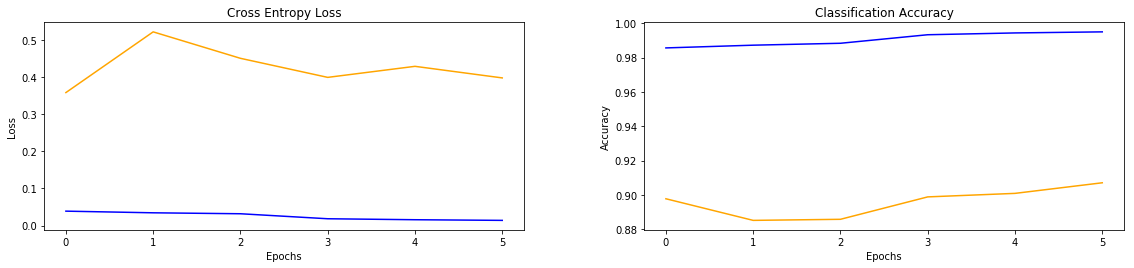

<Figure size 432x288 with 0 Axes>

In [19]:
from tensorflow.keras.utils import multi_gpu_model
#for y in [1,2,3,4,5,6,7,9,14]:
for y in [6]:
    try:
        location="BestWeights_epoch"+str(y)+ ".hdf5"
        checkpointer = ModelCheckpoint(location, monitor='val_acc', verbose=1, save_best_only=True, mode='max')    
        final_location=[]
        location=[]
#         model= Sequential()
#         model.add(base_model)
#         model.add(Conv2D(64, (3, 3), activation = 'relu'))
#         #model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
#         #model.add(MaxPooling2D(pool_size = (2, 2)))
#         model.add(Dropout(0.40))
#         model.add(Conv2D(64, (3, 3), activation = 'relu'))
#         #model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
#         model.add(MaxPooling2D(pool_size = (2, 2)))
#         model.add(Dropout(0.40))
#         model.add(Flatten())
#         model.add(Dense(512,activation='relu'))
#         model.add(Dropout(0.4))
#         model.add(Dense(1, activation='sigmoid'))
    # model.add(Conv2D(512, (3, 3), activation = 'relu'))

        model=load_model("InceptionV34.hdf5")

        parallel_model = multi_gpu_model(model, gpus=2)
        parallel_model.compile(loss='binary_crossentropy',
                               optimizer=Adam(lr=0.001),metrics=["accuracy"])
    #model.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])
        history_model=parallel_model.fit_generator(generator=train_data,
                                steps_per_epoch=train_data.samples//train_data.batch_size,
                                validation_data=val_data,
                                verbose=1,
                                validation_steps=val_data.samples//val_data.batch_size,
                                epochs=y,callbacks=[learning_rate_reduction,es,checkpointer])
        model.save("InceptionV3"+str(y)+".hdf5")
        summarize_diagnostics(history_model,y)
        loss=history_model.history['loss']
        acc=history_model.history['acc']
        valacc=history_model.history['val_acc']
        valloss=history_model.history['val_loss']
        location = [y,loss,acc,valacc, valloss]
        final_location.append(location)
        save1 = pd.DataFrame(final_location,columns=['epochs','loss','acc','valacc','valloss'])
        save1.to_csv('InceptionV3'+str(y)+'.csv')
    except Exception as e: 
        print(e)
        continue